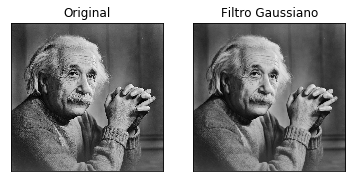

In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#image = input('digite o nome da imagem de entrada: ')
img = cv2.imread('einstein.jpg')
#img = img[::2,::2] # Diminui a imagem
suave = cv2.GaussianBlur(img, ( 3, 3), 0)
#cv2.imshow("Imagens suavisadas pelo filtro Gaussiano", suave)
#cv2.waitKey(0)
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(suave,cmap = 'gray')
plt.title('Filtro Gaussiano'), plt.xticks([]), plt.yticks([])
plt.show()

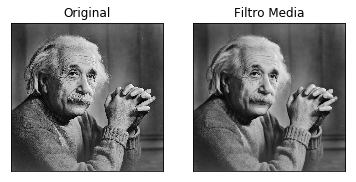

In [40]:
#img = img[::2,::2] # Diminui a imagem
filtro_media = cv2.blur(img, ( 3, 3))
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(filtro_media,cmap = 'gray')
plt.title('Filtro Media'), plt.xticks([]), plt.yticks([])
plt.show()

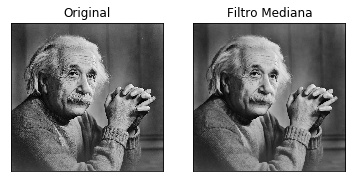

In [41]:
filtro_mediana = cv2.medianBlur(img, 3)
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(filtro_mediana,cmap = 'gray')
plt.title('Filtro Mediana'), plt.xticks([]), plt.yticks([])
plt.show()

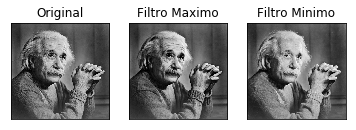

In [42]:
#filtros máximo e mínimo
from scipy import ndimage
from PIL import Image

im = Image.open('einstein.jpg')
data = np.array(im, dtype=float)

filtro_maximo = ndimage.minimum_filter(data, 3)
filtro_minimo = ndimage.maximum_filter(data,3)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(filtro_maximo,cmap = 'gray')
plt.title('Filtro Maximo'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(filtro_minimo,cmap = 'gray')
plt.title('Filtro Minimo'), plt.xticks([]), plt.yticks([])
plt.show()




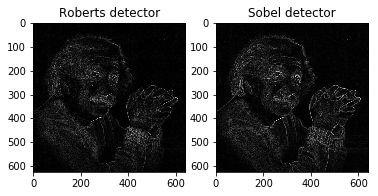

In [43]:
from scipy import ndimage
from PIL import Image

def plot(data, title):
    plot.i += 1
    plt.subplot(1,2,plot.i)
    plt.imshow(data)
    plt.gray()
    plt.title(title)
plot.i = 0

# Carregando a imagem de entrada...
im = Image.open('einstein.jpg')
data = np.array(im, dtype=float)
#plot(data, 'Original')

roberts_cross_v = np.array( [[ 0, 0, 0 ],
                             [ 0, 1, 0 ],
                             [ 0, 0,-1 ]] )

roberts_cross_h = np.array( [[ 0, 0, 0 ],
                             [ 0, 0, 1 ],
                             [ 0,-1, 0 ]] )

sobel_cross_v = np.array( [[ -1, -2, -1 ],
                             [ 0, 0, 0 ],
                             [ 1, 2, 1 ]] )

sobel_cross_h = np.array( [[ -1, 0, 1 ],
                             [ -2, 0, 2 ],
                             [ -1, 0, 1 ]] )

vertical_roberts = ndimage.convolve( data, roberts_cross_v )
horizontal_roberts = ndimage.convolve( data, roberts_cross_h )

vertical_sobel = ndimage.convolve( data, sobel_cross_v )
horizontal_sobel = ndimage.convolve( data, sobel_cross_h )

output_image_roberts = np.sqrt( np.square(horizontal_roberts) + np.square(vertical_roberts))
output_image_sobel = np.sqrt( np.square(horizontal_sobel) + np.square(vertical_sobel))

plot(output_image_roberts, 'Roberts detector')
plot(output_image_sobel, 'Sobel detector')

plt.show()

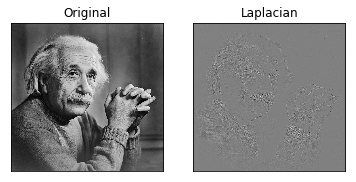

In [45]:

im = Image.open('einstein.jpg')
data = np.array(im, dtype=float)

#máscara laplaciana que combina realce de bordas e reconstrução de fundo
kernel_laplaciano = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])

kernel_laplaciano_discreta = np.array([[0, 1, 0],
                                       [1, -4, 1],
                                       [0, 1, 0]])

output_image_laplaciano=ndimage.convolve(data, kernel_laplaciano_discreta)

plt.subplot(1,2,1),plt.imshow(im,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(output_image_laplaciano,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.show()